# <--- Ex-1 --->

## === Import ===

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['PRICE'] = boston.target
print(boston.DESCR)
print(boston.feature_names)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

__הסבר משתנים:__

0.   CRIM    - שיעור הפשיעה לנפש בכל עיירה <br>
1.   ZN      - יחס אזורי המגורים בכל החלקות מעל 25,000 רגל רבוע <br>
2.   INDUS   - יחס לעסקים שאינם מסחריים בכל עיירה <br>
3.   CHAS    - קרבה לנהר צ'רלס - אם צמוד לנהר 1, אם לא אז 0 <br>
4.   NOX     - ריכוז חנקן חמצני באוויר ביחס של חלק ל10 מיליון <br>
5.   RM      - מספר ממצוע של חדרים בדירה <br>
6.   AGE     - יחס של כמות הנכסים אשר נבנו לפני שנת 1940 <br>
7.   DIS     - המרחק המשוקלל לחמשת מרכזי התעסוקה של בוסטון <br>
8.   RAD     - כמות הדרכים המהירות ההיקפיות הנגישות מאזור זה <br>
9.   TAX     - ערך מס נדל"ן לתשלום על שווי של כל 10,000$ <br>
10.  PTRATIO - יחס מורים לתלמיד בעיירה <br>
11.  B       - 1000(Bk - 0.63)^2 יחס השחורים בעיירה לפי הנוסחה הנתונה <br>
12.  LSTAT   - אחוז התושבים במעמד נמוך <br>
13.  MEDV    - שווי הבתים (מחיר) החציוני באלפי דולר - נתון המטרה <br>


## === Explore ===

Text(0, 0.5, 'Number of houses')

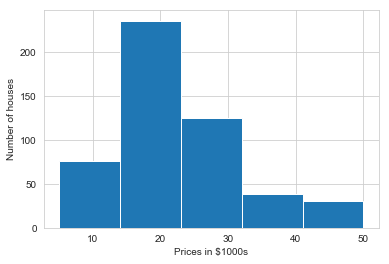

In [4]:
plt.hist(boston.target,bins = 5)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')


Text(0, 0.5, 'Number of houses')

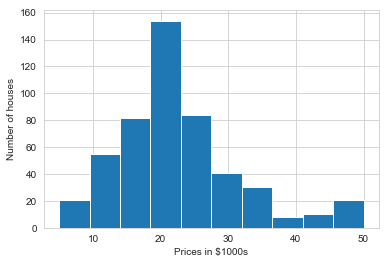

In [5]:
plt.hist(boston.target,bins = 10)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')


Text(0, 0.5, 'Number of houses')

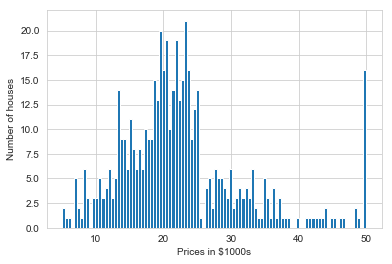

In [6]:
plt.hist(boston.target,bins = 100)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')


Text(0, 0.5, 'Number of houses')

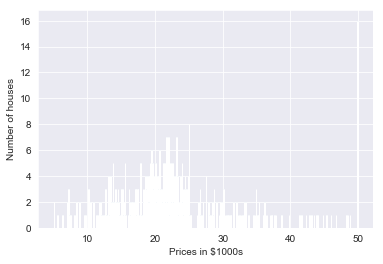

In [7]:
sns.set_style('darkgrid')
plt.hist(boston.target,bins = 500)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')


Text(0, 0.5, 'Number of houses')

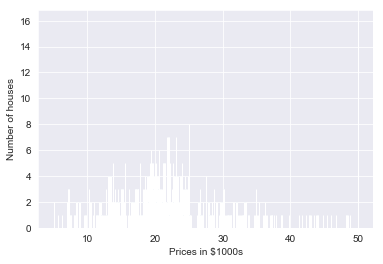

In [8]:
plt.hist(boston.target,bins = 1000)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')


ההיסטוגרמה של 500 עמודות ושל 1000 עמודות כמעט זהות בגלל שיש לנו סה"כ 506 שורות במאגר המידע שלנו. <br>
במקרה שאנחנו רוצים להציג יותר מ-500 עמודות בהיסטוגרמה שלנו נקבל את אותן התוצאות כל פעם.

Text(0.5, 0, 'Pupil-teacher ratio')

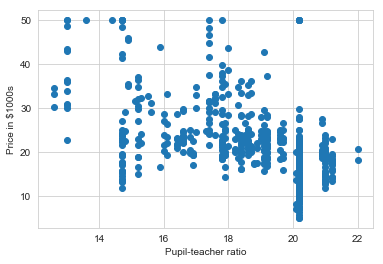

In [9]:
sns.set_style('whitegrid')

plt.scatter(boston.data[:, 10],boston.target)

plt.ylabel('Price in $1000s')
plt.xlabel('Pupil-teacher ratio')


__קיימת קורלציה__ בין יחס מספר התלמידים למורה לבין מחיר הנכס הממוצע. <br>
עם עליית מספר התלמידים למורה יורד שווי הנכס הממוצע. <br>
עם זאת, __קורלציה זו חלשה__.

Text(0.5, 0, 'units built prior to 1940')

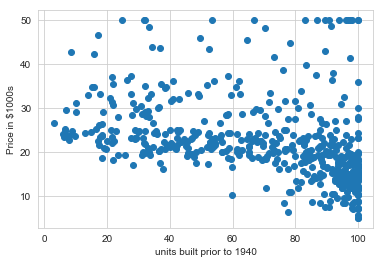

In [10]:
plt.scatter(boston.data[:, 6],boston.target)

plt.ylabel('Price in $1000s')
plt.xlabel('units built prior to 1940')


Text(0.5, 0, 'average number of rooms')

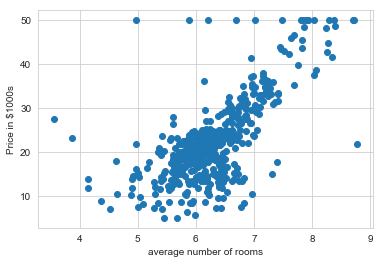

In [11]:
plt.scatter(boston.data[:, 5],boston.target)

plt.ylabel('Price in $1000s')
plt.xlabel('average number of rooms')


Text(0.5, 0, 'proportion of non-retail business')

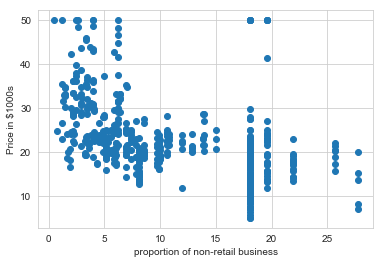

In [12]:
plt.scatter(boston.data[:, 2],boston.target)

plt.ylabel('Price in $1000s')
plt.xlabel('proportion of non-retail business')


Text(0.5, 0, 'property-tax rate')

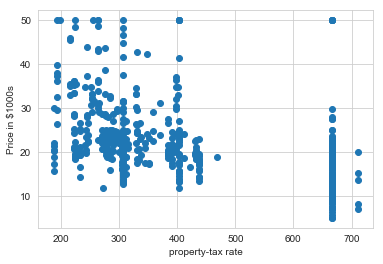

In [13]:
plt.scatter(boston.data[:, 9],boston.target)

plt.ylabel('Price in $1000s')
plt.xlabel('property-tax rate')


Text(0.5, 0, '% lower status of the population')

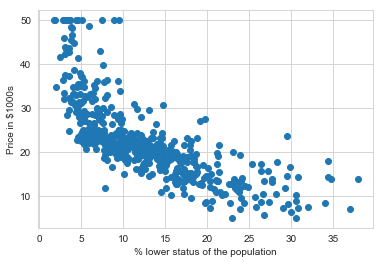

In [14]:
plt.scatter(boston.data[:, 12],boston.target)

plt.ylabel('Price in $1000s')
plt.xlabel('% lower status of the population')


לכמות החדרים ולאחוז האוכלוסיה החלשה קיימת קורלציה חזקה עם המחיר הממוצע.

אני מניח כי גורמים אלו משפיעים מאוד על המחיר הממוצע בעיירה - עיירות עם אוכלוסיות בחתך סוציואקונומי נמוך ועם דירות קטנות יהיו עם מחיר ממוצע נמוך יותר.

In [15]:
boston_df[:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


C:\Users\kinar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Pupil-teacher-ratio and Price Relationship')

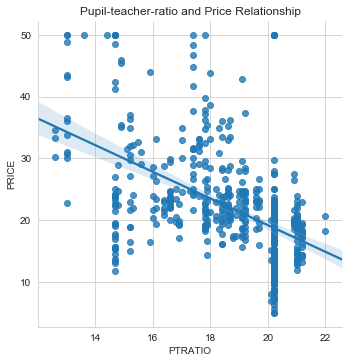

In [16]:
sns.lmplot('PTRATIO','PRICE',data=boston_df)
plt.title('Pupil-teacher-ratio and Price Relationship')

הרקע בצבע תכלת בהיר מעיד על רמת הביטחון של קו הרגרסיה. ככל שהחלק הבהיר רחב יותר ורחוק יותר מקו הרגרסיה המשמעות היא שקיימת שונות גבוהה יותר בנתונים באזור זה ולכן אמינות הנתונים נמוכה יותר.

C:\Users\kinar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Number of Rooms and Price Relationship')

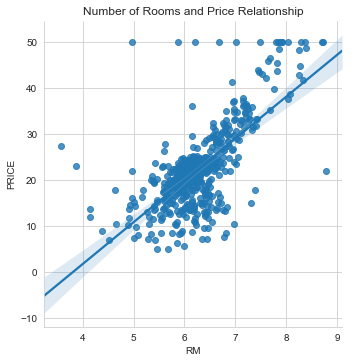

In [17]:
sns.lmplot('RM','PRICE',data=boston_df)
plt.title('Number of Rooms and Price Relationship')

C:\Users\kinar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Lower Population Status and Price Relationship')

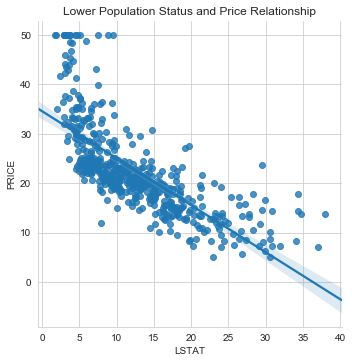

In [18]:
sns.lmplot('LSTAT','PRICE',data=boston_df)
plt.title('Lower Population Status and Price Relationship')

## === Regression ===

In [19]:
X = np.vstack(boston_df.RM) # vectorize RM col
X = np.array([np.concatenate((i,[1])) for i in X]) # transpose and add 1 col
Y = boston_df.PRICE # vectorize PRICE col as target

In [20]:
s, totalError, _, _ = np.linalg.lstsq(X,Y)
m, b = s
x = boston_df.RM

C:\Users\kinar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


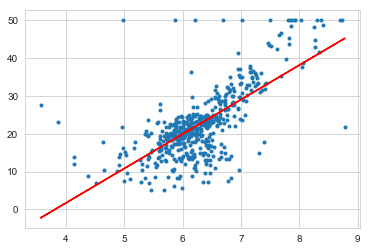

In [21]:
plt.plot(boston_df.RM,boston_df.PRICE,'.')
plt.plot(x, m*x+b, 'red')

In [22]:
result = np.linalg.lstsq(X,Y)
error_tot = result[1]
rmse = np.sqrt(error_tot/len(X))
rmse

C:\Users\kinar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([6.60307139])

RMSE = 6.60307139

המשמעות של מספר זה היא שהטעות הממוצעת במחיר הבית היא 6,600 דולר  לכל כיוון או סה"כ: 13,200 דולר

In [23]:
lreg = LinearRegression()
X_multi = boston_df.drop('PRICE',1)
Y_target = boston_df.PRICE

lreg.fit(X_multi,Y_target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
print(len(lreg.coef_))
print(lreg.coef_)

13
[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [25]:
print(lreg.intercept_)

36.45948838509015


In [26]:
coefDF = DataFrame(boston_df.columns)
coefDF.columns = ['Features']
coefDF['Coef Estimate'] = Series(lreg.coef_)
coefDF

,Features,Coef Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


__המקדמים של המשתנים הם:__ <br>
0.   CRIM:   -1.08011358e-01 <br>
1.   ZN:      4.64204584e-02  <br>
2.   INDUS:   2.05586264e-02 <br>
3.   CHAS:    2.68673382e+00 <br>
4.   NOX:    -1.77666112e+01 <br>
5.   RM:      3.80986521e+00 <br>
6.   AGE:     6.92224640e-04 <br>
7.   DIS:    -1.47556685e+00 <br>
8.   RAD:     3.06049479e-01 <br>
9.   TAX:    -1.23345939e-02 <br>
10.  PTRATIO:-9.52747232e-01<br>
11.  B:       9.31168327e-03<br>
12.  LSTAT:  -5.24758378e-01<br>

באופן מפתיע (!) המקדם עם הערך הגבוה ביותר הוא מדד החנקן החמצני (4). <br> 
המשמעות היא שככל שמדד זה גבוה יותר ערך הבתים יהיה נמוך יותר (בגלל הסימן השלילי). <br>
שני משפיעים חזקים נוספים הם מספר החדרים והקרבה לנהר צ'רלס.

## === Train Test Split ===

mean squered train: 22.477983821877878
mean squered test: 21.897765396049525


Text(0.5, 1.0, 'Residual Error Plot')

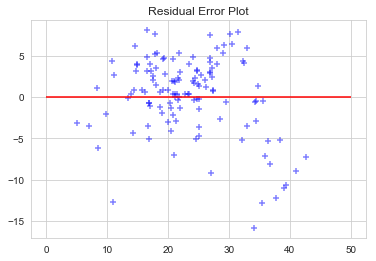

In [27]:
X_train, X_test, Y_train, Y_test = \
    sklearn.model_selection.train_test_split(boston_df.drop('PRICE',1), 
                                             boston_df.PRICE,
                                             random_state = 1)
lreg = LinearRegression()
lreg.fit(X_train,Y_train)
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

mean2_train = np.mean((Y_train - pred_train)**2)
mean2_test = np.mean((Y_test - pred_test)**2)
print('mean squered train:', mean2_train)
print('mean squered test:', mean2_test)

plt.scatter(pred_test,(pred_test - Y_test), marker='+', color = 'blue', alpha = 0.5)
plt.hlines(y=0, xmin = 0, xmax = 50, color = 'red')
plt.title('Residual Error Plot')

מהגרף מעלה ניתן לראות כי לא קיימת מגמה ברורה בגרף. <br>
למרות זאת, השגיאות עדיין גדולות מאוד. מגיעות עד שווי של מחצית מחיר הדירה. <br>

אני מעריך שניתן להמשיך ולשפר את התחזית...

# === עד כאן שיעורי הבית, מכאן נסיונות שלי ===

### --> עריכת המשתנים
נראה שאפקטיבי מעט

C:\Users\kinar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


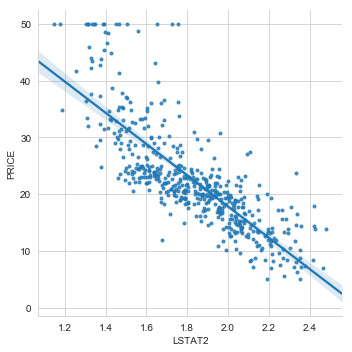

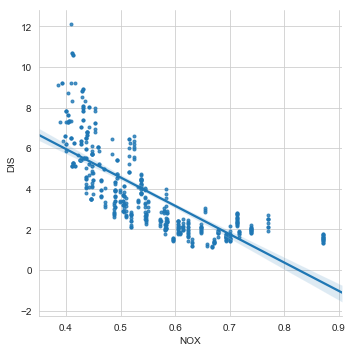

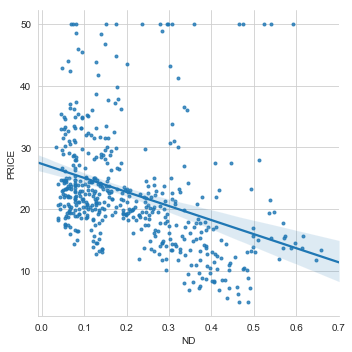

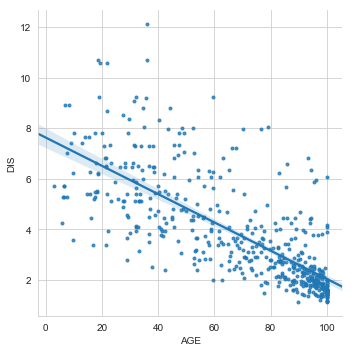

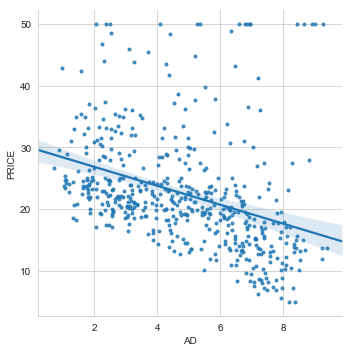

In [29]:
BosNonLin = boston_df.drop(['B','TAX','INDUS','ZN'],1)
BosNonLin['LSTAT2'] = BosNonLin.LSTAT**(1/4)
BosNonLin['ND'] = BosNonLin.NOX/BosNonLin.DIS
BosNonLin['AD'] = (BosNonLin.AGE/BosNonLin.DIS)**0.5

sns.lmplot('LSTAT2','PRICE',data=BosNonLin,markers='.')
sns.lmplot('NOX','DIS',data=BosNonLin,markers='.')
sns.lmplot('ND','PRICE',data=BosNonLin,markers='.')
sns.lmplot('AGE','DIS',data=BosNonLin,markers='.')
sns.lmplot('AD','PRICE',data=BosNonLin,markers='.')


   Features  Coef Estimate
0      CRIM      -0.187662
1      CHAS       2.770422
2       NOX     -30.691705
3        RM       2.026170
4       AGE      -0.005441
5       DIS      -0.531534
6       RAD       0.138398
7   PTRATIO      -0.856873
8     LSTAT       0.560098
9    LSTAT2     -35.744396
10       ND       9.546131
11       AD       0.881444
mean squered train: 17.003305981831566
mean squered test: 19.20089389535179


Text(0.5, 1.0, 'Residual Error Plot')

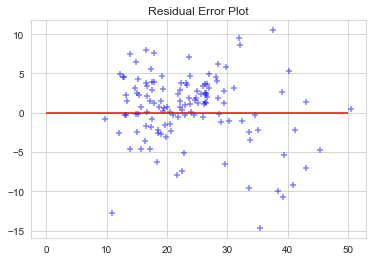

In [30]:
X_train, X_test, Y_train, Y_test = \
    sklearn.model_selection.train_test_split(BosNonLin.drop(['PRICE'],1),
                                             BosNonLin.PRICE,
                                             random_state=1)

lreg = LinearRegression()
lreg.fit(X_train,Y_train)
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)
mean2_train = np.mean((Y_train - pred_train)**2)
mean2_test = np.mean((Y_test - pred_test)**2)

coefDF = DataFrame(BosNonLin.columns.drop('PRICE',1))
coefDF.columns = ['Features']
coefDF['Coef Estimate'] = Series(lreg.coef_)
print(coefDF)
print('mean squered train:', mean2_train)
print('mean squered test:', mean2_test)

plt.scatter(pred_test,(pred_test - Y_test), marker='+', color = 'blue', alpha = 0.5)
plt.hlines(y=0, xmin = 0, xmax = 50, color = 'red')
plt.title('Residual Error Plot')
